# Shoes: A list of several shoes and the various prices at which they are sold

## Introduction

The two datasets we are working with are a list of women's shoes and a list of men's shoes. The datasets include shoe name, brand, price, and more. The data is provided by Datafiniti's Product Database, and looks to be scraped from popular retail sites such as Overstock, Walmart, and Amazon. 

Looking at this data, we can hope to understand:
- If women's and men's shoes are priced similarly
- What brands are prevalent in women's and men's shoes
- What types of price distributions there are across brands, and if there is a significant difference in prices for men's and women's shoes in those brands
- If there are price distributions within the brands based on shoe color

In [323]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns

## Importing and Formatting Data: 



In [202]:
# Importing the Women's shoes dataset
df = pd.read_csv('Womens_shoes.csv', low_memory=False)

# Importing the Men's shoes dataset

df2 = pd.read_csv('7004_1.csv', error_bad_lines=False, low_memory=False)

b'Skipping line 251: expected 48 fields, saw 49\nSkipping line 444: expected 48 fields, saw 50\nSkipping line 847: expected 48 fields, saw 49\nSkipping line 848: expected 48 fields, saw 49\nSkipping line 1018: expected 48 fields, saw 49\nSkipping line 1575: expected 48 fields, saw 51\nSkipping line 2133: expected 48 fields, saw 49\nSkipping line 2922: expected 48 fields, saw 51\nSkipping line 3777: expected 48 fields, saw 51\nSkipping line 4057: expected 48 fields, saw 49\nSkipping line 4239: expected 48 fields, saw 49\nSkipping line 4240: expected 48 fields, saw 49\nSkipping line 4384: expected 48 fields, saw 49\nSkipping line 4385: expected 48 fields, saw 49\nSkipping line 5388: expected 48 fields, saw 49\nSkipping line 5480: expected 48 fields, saw 49\nSkipping line 5481: expected 48 fields, saw 49\nSkipping line 5907: expected 48 fields, saw 50\nSkipping line 5908: expected 48 fields, saw 50\nSkipping line 6600: expected 48 fields, saw 49\nSkipping line 6601: expected 48 fields, sa

In [203]:
# Getting a glimpse of the datasets
df.head()

,id,asins,brand,categories,colors,count,dateAdded,dateUpdated,descriptions,dimension,...,skus,sourceURLs,upc,vin,websiteIDs,weight,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [204]:
df2.head()

,id,asins,brand,categories,colors,count,dateAdded,dateUpdated,descriptions,dimension,...,prices.warranty,quantities,reviews,sizes,skus,sourceURLs,upc,vin,websiteIDs,weight
0,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.993020e+11,NaN,NaN,NaN
1,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.993020e+11,NaN,NaN,NaN
2,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN
3,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN
4,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN


In [205]:
print(df.shape)
print(df2.shape)

(33801, 52)
(19315, 48)


The women's and men's shoe datasets are large (33801 rows x 52 columns and 19315 rows x 48 columns, respectively) and have several columns of information, such as features and image URLS that are not of interest to us. There are also many rows with missing price information, which need to be removed. The information on the data that we are going to focus on is brand, color, and price. 



In [206]:
# Limiting the datasets to id, brand, color, and price

# Women's dataset
df = df[['brand', 'colors', 'prices.amountMin', 'prices.amountMax']]

# Men's dataset
df2 = df2[['brand', 'colors', 'prices.amountMin', 'prices.amountMax']]

# Getting rid of any data points with missing values
df.dropna(inplace=True)
df2.dropna(inplace=True)

# To get an average price for each shoe, we will take the average of 'prices.amountMin' and 'prices.amountMax'
df['price'] = (df['prices.amountMin'] + df['prices.amountMax']) / 2
# Narrowing down the dataframe to brand, color, and the average price for each shoe
df = df[['brand', 'colors', 'price']]

# For men's, the prices are stored as objects, so we have to convert them into float value first
df2['prices.amountMin'] = df2['prices.amountMin'].convert_objects(convert_numeric=True)
df2['prices.amountMax'] = df2['prices.amountMax'].convert_objects(convert_numeric=True)
# Creating a column for the average price of the shoes
df2['price'] = (df2['prices.amountMin'] + df2['prices.amountMax']) / 2
df2 = df2[['brand', 'colors', 'price']]



/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [247]:
# Finalizing the structure of the datasets and concactenating them

# Adding a column to each dataframe and populating it based on the gender 

df['gender'] = 'womens'
df2['gender'] = 'mens'

df.columns = ['brand', 'color', 'price', 'gender']
df2.columns = ['brand', 'color', 'price', 'gender']

frames = [df, df2]
shoes = pd.concat(frames, keys = ['womens', 'mens'])
shoes = shoes[shoes.price > 0].dropna()

## Description of the Dataset:

Now that we have cleaned up our data and organized it all into one working dataframe, we can start to dive into it. There are 30,077 rows of entries for shoes, with 4 columns of data for the brand, color, price, and gender of the shoes. 

In [248]:
shoes.columns

Index(['brand', 'color', 'price', 'gender'], dtype='object')

In [249]:
shoes.shape

(30077, 4)

In [250]:
shoes.dtypes

brand      object
color      object
price     float64
gender     object
dtype: object

In [251]:
shoes.head()

brand   color  price  gender
womens 0  Novica  Purple  62.99  womens
       1  Novica  Purple  62.99  womens
       2  Novica  Purple  62.99  womens
       3  Novica  Purple  62.99  womens
       4  Novica  Purple  62.99  womens

## Visualizing the Data:

Before we conduct any in-depth analysis of the dataset, we should look at how the data is distributed.

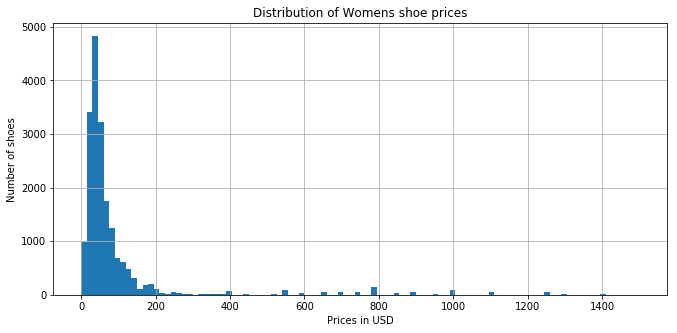

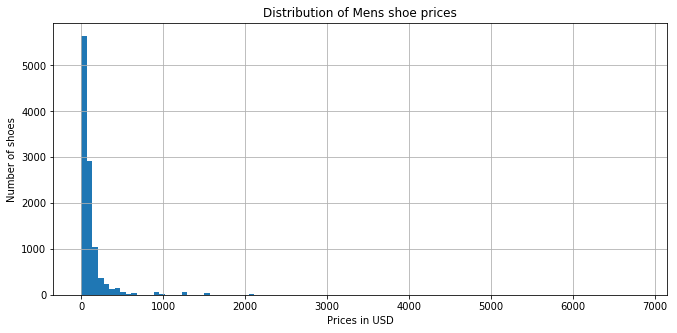

In [313]:
# Plotting the distribution of prices in women's shoes and men's shoes

shoes.loc['womens'].hist(bins=100)
plt.title('Distribution of Womens shoe prices')
plt.xlabel('Prices in USD')
plt.ylabel('Number of shoes')

shoes.loc['mens'].hist(bins=100)
plt.title('Distribution of Mens shoe prices')
plt.xlabel('Prices in USD')
plt.ylabel('Number of shoes')

plt.show()

Both women's and men's price subsets display right-skewedness, and need to be normalized in order to be compnared. Using a natural logarithimic transformation, we can normalize the distributions.

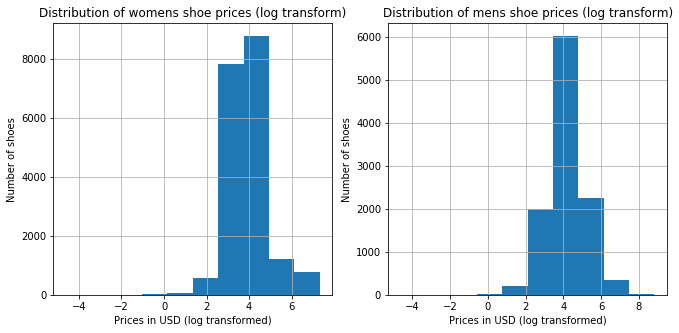

In [265]:
plt.rcParams['figure.figsize'] = 11, 5

plt.subplot(1, 2, 1)
np.log(shoes.loc['womens'].price).hist()
plt.title('Distribution of womens shoe prices (log transform)')
plt.xlabel('Prices in USD (log transformed)')
plt.ylabel('Number of shoes')

plt.subplot(1, 2, 2)
np.log(shoes.loc['mens'].price).hist()
plt.title('Distribution of mens shoe prices (log transform)')
plt.xlabel('Prices in USD (log transformed)')
plt.ylabel('Number of shoes')

plt.show()


Now that we have normalized the women's and men's shoe price distributions, we can compare them. Using a t-test, we can compare the normalized mean prices of women's and men's shoes in this dataset. The null hypothesis is that women's and men's shoes are priced similarly, and have no significant difference in mean prices respectively. The test will be evaluated at a default p = 0.05


In [290]:
# Taking random samples from the log-transformed womens and mens shoes:

womens_sample = np.log(shoes.loc['womens'].price).sample(n=100, random_state=1)
mens_sample = np.log(shoes.loc['mens'].price).sample(n=100, random_state=1)


In [291]:
from scipy.stats import ttest_ind

print(ttest_ind(womens_sample, mens_sample, equal_var=False))


Ttest_indResult(statistic=-1.9964977365545986, pvalue=0.04725226712964421)


Results from the t-test yield a negative t-statistic and p-value of 0.0472, which tells us to reject our null hypothesis at the 0.05 significance level. In other words, women's and men's shoe mean prices are significantly different. The negative t-statistic value tells us that men's shoe prices are actually more expensive than women's shoe prices on average.

### Looking at the most popular brands for women's and men's shoes:

To get a better idea of how prices for women's and men's shoes compare, we can take a look at the brands in the data set. 

Most frequent brands in women's shoes: 

In [257]:
shoes.loc['womens'].brand.value_counts().head(10)

Journee Collection    1397
Ralph Lauren           990
Novica                 574
Propet                 446
Nike                   404
Easy Spirit            326
Nature Breeze          301
In-Sattva              288
Nine West              278
Hadari                 258
Name: brand, dtype: int64

Most frequent brands in men's shoes:

In [258]:
shoes.loc['mens'].brand.value_counts().head(10)

Nike            1244
Ralph Lauren     692
PUMA             401
New Balance      296
VANS             272
Reebok           207
Converse         135
Unbranded        124
adidas           122
Jordan           114
Name: brand, dtype: int64

## Looking at the price distribution across the most popular brands


Looks like Ralph Lauren and Nike are both in the top 10 for most popular brands of shoes for women and men. Lets take a look at how the prices of these shoes are distributed with respect to women and men 

#### Ralph Lauren

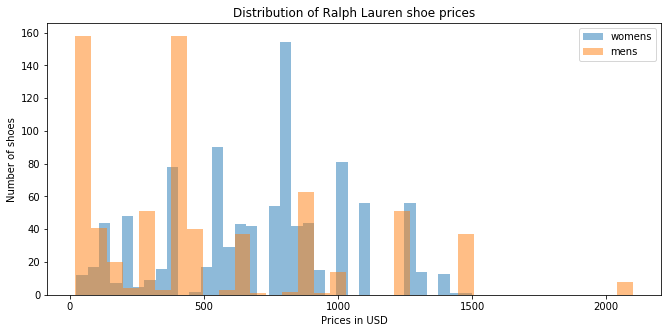

In [356]:
plt.rcParams['figure.figsize'] = 11, 5

plt.hist(shoes[shoes.brand == 'Ralph Lauren'].loc['womens'].price, bins = 35, alpha=0.5, label='womens') # bin size a little coarse
plt.hist(shoes[shoes.brand == 'Ralph Lauren'].loc['mens'].price, bins = 35, alpha=0.5, label='mens')

plt.title('Distribution of Ralph Lauren shoe prices')
plt.xlabel('Prices in USD')
plt.ylabel('Number of shoes')


plt.legend(loc='upper right')
plt.show()

In order to compare the women's and men's Ralph Lauren shoe prices, we need to fit these distributions to parametric models so that we can get an idea of what type of transformation these distributions require:

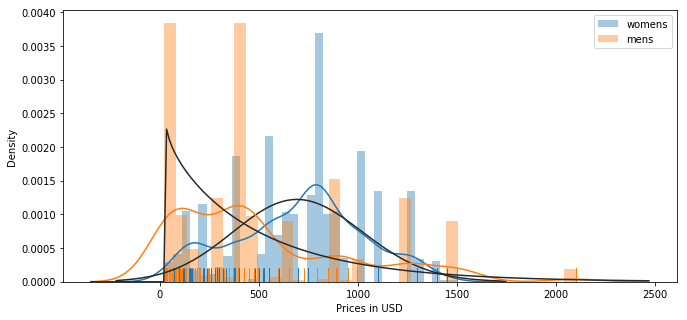

In [369]:
plt.rcParams['figure.figsize'] = 11, 5

sns.distplot(shoes[shoes.brand == 'Ralph Lauren'].loc['womens'].price, label='womens',bins=35, kde=True, rug=True, fit=stats.gamma)
sns.distplot(shoes[shoes.brand == 'Ralph Lauren'].loc['mens'].price, label='mens', bins=35, kde=True, rug=True, fit=stats.gamma)
plt.xlabel('Prices in USD')
plt.ylabel('Density')
plt.legend();


Looks like the women's Ralph Lauren distribution is somewhat normal, while the men's Ralph Lauren distribution is more vague. Both distributions can't be normalized with the same transformation. Due to the non-parametric nature of these distributions, we will use the Mann-Whitney U test to compare them.

The Mann-Whitney U test is a non-parametric test that can be used in place of an
unpaired t-test. It is used to test the null hypothesis that two samples come from the
same population (i.e. have the same median) or, alternatively, whether observations in one
sample tend to be larger than observations in the other.

In [401]:
# Using the Mann-Whitney U Test to compare the sample means of womens and mens Ralph Lauren Shoes
RL_womens_sample = shoes[shoes.brand == 'Ralph Lauren'].loc['womens'].price.sample(n=100, random_state=1)
RL_mens_sample = shoes[shoes.brand == 'Ralph Lauren'].loc['mens'].price.sample(n=100, random_state=1)

stats.mannwhitneyu(RL_womens_sample, RL_mens_sample, use_continuity=True, alternative=None)

MannwhitneyuResult(statistic=3332.5, pvalue=2.273560708864803e-05)

The Mann-Whitney U Test yields a p-value of $ 2.27 * 10 ^{-5} $, which allows us to reject the null hypothesis that the samples come from the same population, and that there is a significant difference between women's Ralph Lauren shoe prices compared to men. A caveat about this conclusion - This dataset has prices listed for all sorts of women's and men's Ralph Lauren shoes and many different styles of shoes are lumped together. It is difficult to draw a one-to-one comparision between vastly different styles of shoes, which may be the the primary contributing factor to the shoe prices. I.e. a women's knee-high riding boot does not draw a one-to-one comparision between a men's chukka boot. 

### Nike

Nike is the world's largest supplier of athletic shoes, and unsurprisngly one of the most popular brands to appear on this dataset. Nike is interesting because many of the shoes the company manufactures have a men's and women's version. This allows us to draw a more accurate one-to-one comparision. Lets see how women's and men's Nike shoe prices are distributed, and if there is a significant difference in their pricing.  

Women's Nike shoe price statistics: 

In [381]:
shoes[shoes.brand == 'Nike'].loc['womens'].price.describe()

count    404.000000
mean      98.135012
std       32.038731
min       16.750000
25%       75.210000
50%       97.780000
75%      114.900000
max      212.000000
Name: price, dtype: float64

Men's Nike shoe price statistics:

In [382]:
shoes[shoes.brand == 'Nike'].loc['mens'].price.describe()

count    1244.000000
mean      102.051949
std        79.393643
min         1.000000
25%        54.990000
50%        80.540000
75%       122.510000
max       751.800000
Name: price, dtype: float64

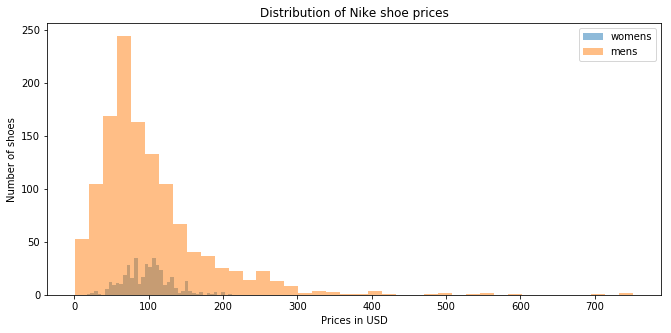

In [342]:
plt.rcParams['figure.figsize'] = 11, 5
plt.hist(shoes[shoes.brand == 'Nike'].loc['womens'].price, bins=40, alpha=0.5, label='womens')
plt.hist(shoes[shoes.brand == 'Nike'].loc['mens'].price, bins=40, alpha=0.5, label='mens')
#shoes[shoes.brand == 'Nike'].loc['womens'].hist(alpha=0.5, label='womens')
plt.title('Distribution of Nike shoe prices')
plt.xlabel('Prices in USD')
plt.ylabel('Number of shoes')


plt.legend(loc='upper right')
plt.show()

In order to compare the women's and men's Nike shoe prices, we need to fit these distributions to parametric models so that we can get an idea of what type of statistical tests to run and transformation these distributions require:

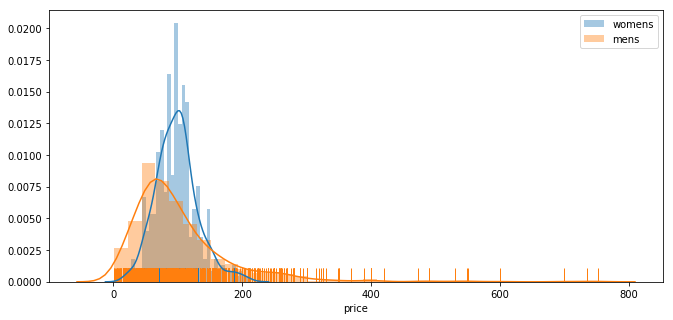

In [344]:
plt.rcParams['figure.figsize'] = 11, 5
sns.distplot(shoes[shoes.brand == 'Nike'].loc['womens'].price, label='womens',bins=35, kde=True, rug=True)#, fit=stats.gamma)
sns.distplot(shoes[shoes.brand == 'Nike'].loc['mens'].price, label='mens', bins=35, kde=True, rug=True)#, fit=stats.gamma)
plt.legend();

Looks like both of the shoe distributions follow a similar distribution, looking slightly normal but with some outliers causing a slight rightward skew in the mens shoes, and very high density in the middle of the women's distribution. We will use both a t-test and cross-validate with a Mann-Whitney U Test at a 0.05 siginificance level to determine if there is a significant difference in women's and men's Nike shoe prices. The null hypothesis is that women's and men's Nike shoe prices are equal.

In [338]:
# T test to see if there is a difference in Women's and Men's Nike shoe prices
nike_womens_sample = shoes[shoes.brand == 'Nike'].loc['womens'].price.sample(n=100, random_state=1)
nike_mens_sample = shoes[shoes.brand == 'Nike'].loc['mens'].price.sample(n=100, random_state=1)                                                                           
print(ttest_ind(nike_womens_sample, nike_mens_sample, equal_var=False))


Ttest_indResult(statistic=-1.09129164872419, pvalue=0.27721487201232115)


In [383]:
# Mann-Whitney U Test:
stats.mannwhitneyu(nike_womens_sample, nike_mens_sample, use_continuity=True, alternative=None)


MannwhitneyuResult(statistic=4415.5, pvalue=0.07678969903449932)

The t-test and Mann-Whitney U test yield p-values of 0.27 and 0.07, failing to reject the null hypothesis. Looks like Nike does price its shoes similarly for women and men, which is nice to see.

### Is color a contributing factor to price differences? Are there certain colors within brands that are more expensive?



Here are the most popular colors in the Ralph Lauren women's shoe subset:

In [386]:
# Looking at the most popular colors within Women's Ralph Lauren Shoes
shoes[shoes.brand == 'Ralph Lauren'].loc['womens'].color.value_counts().head(10)

Black                      167
RL Gold,Black              109
Black,Brown                 87
Dark Brown,Black,Saddle     79
Tan                         58
Dark Brown,Black            56
Camel,Snuff,Cream           41
Camel                       33
Snuff                       29
Brown,Black                 28
Name: color, dtype: int64

#### Ralph Lauren price distributions
Here we look at the price distributions across the most popular shoe colors of Ralph Lauren Women's shoes:

Index(['Black', 'RL Gold,Black', 'Black,Brown', 'Dark Brown,Black,Saddle',
       'Tan', 'Dark Brown,Black', 'Camel,Snuff,Cream', 'Camel', 'Snuff',
       'Brown,Black'],
      dtype='object')


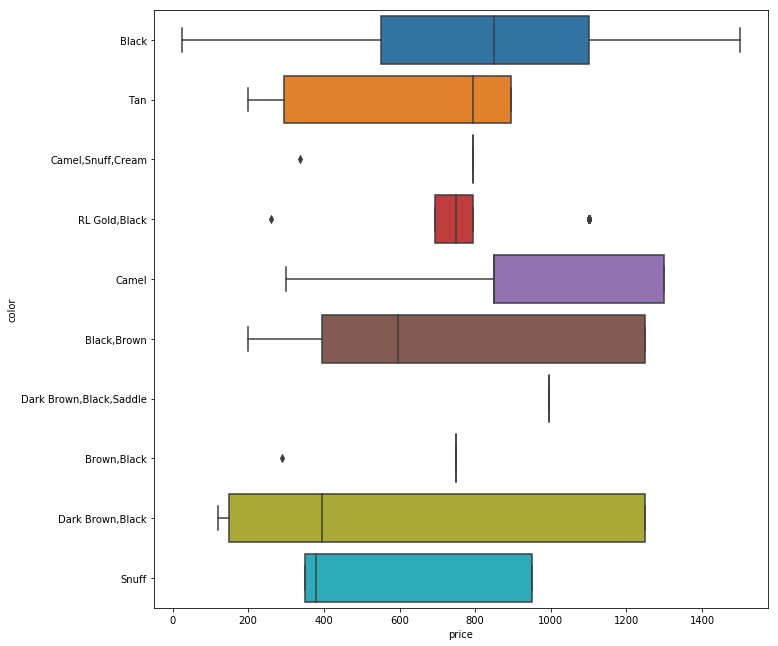

In [347]:
plt.rcParams['figure.figsize'] = 11, 11
RL = shoes[shoes.brand == 'Ralph Lauren'].loc['womens'].color.value_counts().head(10).index
print(RL)
sns.boxplot(x='price', y='color', data=shoes[(shoes.brand=='Ralph Lauren') & (shoes.color.isin(RL))])
plt.show()

Looks like there is a very diverse spread of pricing based on the color

#### An interesting comparision would be to see if "tan" and "camel" colored Ralph Lauren shoes are distributed differently and if there is a significant difference in prices between those two colors

Tan and camel are both very similar colors but have very different price distributions. Lets look into them:

Tan colored women's Ralph Lauren shoe price statistics:

In [398]:
shoes[shoes.brand == 'Ralph Lauren'][shoes.color == 'Tan'].loc['womens'].price.describe()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


count     58.000000
mean     772.724138
std      105.919830
min      378.000000
25%      650.000000
50%      795.000000
75%      795.000000
max      895.000000
Name: price, dtype: float64

In [399]:
shoes[shoes.brand == 'Ralph Lauren'][shoes.color == 'Camel'].loc['womens'].price.describe()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


count      33.000000
mean      992.151515
std       300.839359
min       299.000000
25%       850.000000
50%       850.000000
75%      1300.000000
max      1300.000000
Name: price, dtype: float64

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


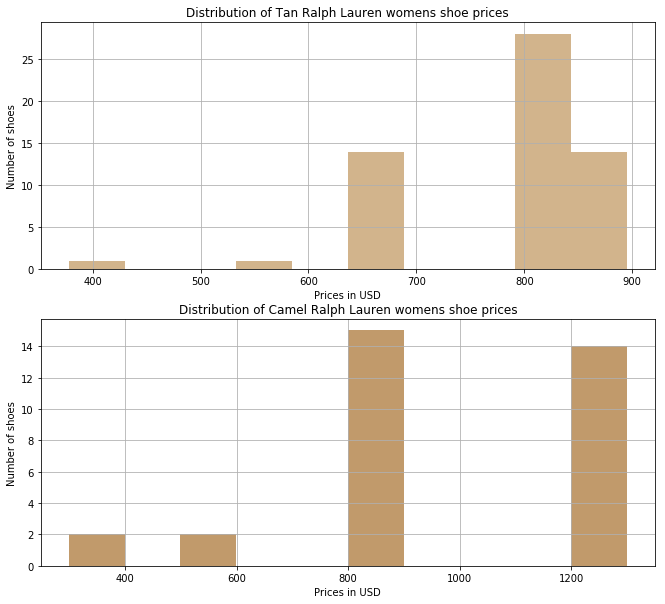

In [390]:
plt.rcParams['figure.figsize'] = 11, 10

plt.subplot(2, 1, 1)
shoes[shoes.brand == 'Ralph Lauren'][shoes.color == 'Tan'].loc['womens'].price.hist(color='tan')
plt.title('Distribution of Tan Ralph Lauren womens shoe prices')
plt.xlabel('Prices in USD')
plt.ylabel('Number of shoes')

plt.subplot(2, 1, 2)
shoes[shoes.brand == 'Ralph Lauren'][shoes.color == 'Camel'].loc['womens'].price.hist(color='#C19A6B')
plt.title('Distribution of Camel Ralph Lauren womens shoe prices')
plt.xlabel('Prices in USD')
plt.ylabel('Number of shoes')

plt.legend
plt.show()

Due to the clear non-parametric nature of the tan and camel shoe distributions, we will use a Mann-Whitney U Test to see if there is a significant difference in prices between these colors. The null hypothesis is that these colors have the same median price and that there is no difference in pricing between these colors. We will evaluate at a 0.05 significance level.


In [400]:
# T-Test to see if there is a significant difference in prices between 
# Tan and Camel Ralph Lauren shoes
tan_RL = shoes[shoes.brand == 'Ralph Lauren'][shoes.color == 'Tan'].loc['womens'].price
camel_RL = shoes[shoes.brand == 'Ralph Lauren'][shoes.color == 'Camel'].loc['womens'].price
stats.mannwhitneyu(tan_RL, camel_RL, use_continuity=True, alternative=None)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


MannwhitneyuResult(statistic=432.0, pvalue=4.725281366480138e-06)

The Mann-Whitney U Test yields a p-value of $4.73 * 10^{-6}$, clearly below the 0.05 siginificance level, allowing us to reject our null hypothesis. Looks like camel colored shoes are significantly more expensive than tan colored shoes. Camel sounds like a premium colorway as opposed to tan.

## Limitations and Further Research

The primary datasets used in this study gave insights about many women's and men's shoes, but did not account for all shoes in general. While these datasets had many data points, they are not representative of the shoe market as a whole, but serve to give a small glimpse into it. The data was sourced from multiple retailers which provides a a more diverse source of pricing, but does not focus on any one type of shoe. 

### Future thoughts 

In order to draw better one-to-one comparisions between shoe types, such as sandals, boots, sneakers, etc., methodology such as NLP could be used in the future to parse this dataset and provide more detailed insights. NLP could be used to identify the different retailers and provide information on which websites, such as Amazon or Overstock, provide the best prices for the same shoes. If the dataset was populated more robustly with shoe sizes, we could observe trends amongst shoe sizes and prices as well. The orignial datasets had a lot of image URLs, which provide opportunities for using computer vision to implement image classification techniques and provide further differentiation between styles of shoe and drive e-commerce insights. 